# **2.1. Непрерывные С.В. Функция распределения и плотность распределения**

Непрерывная СВ (НСВ). Функция распределения НСВ. Плотность распределения НСВ. Примеры простых вероятностных распределений НСВ: равномерное распределение, экспоненциальное распределение.


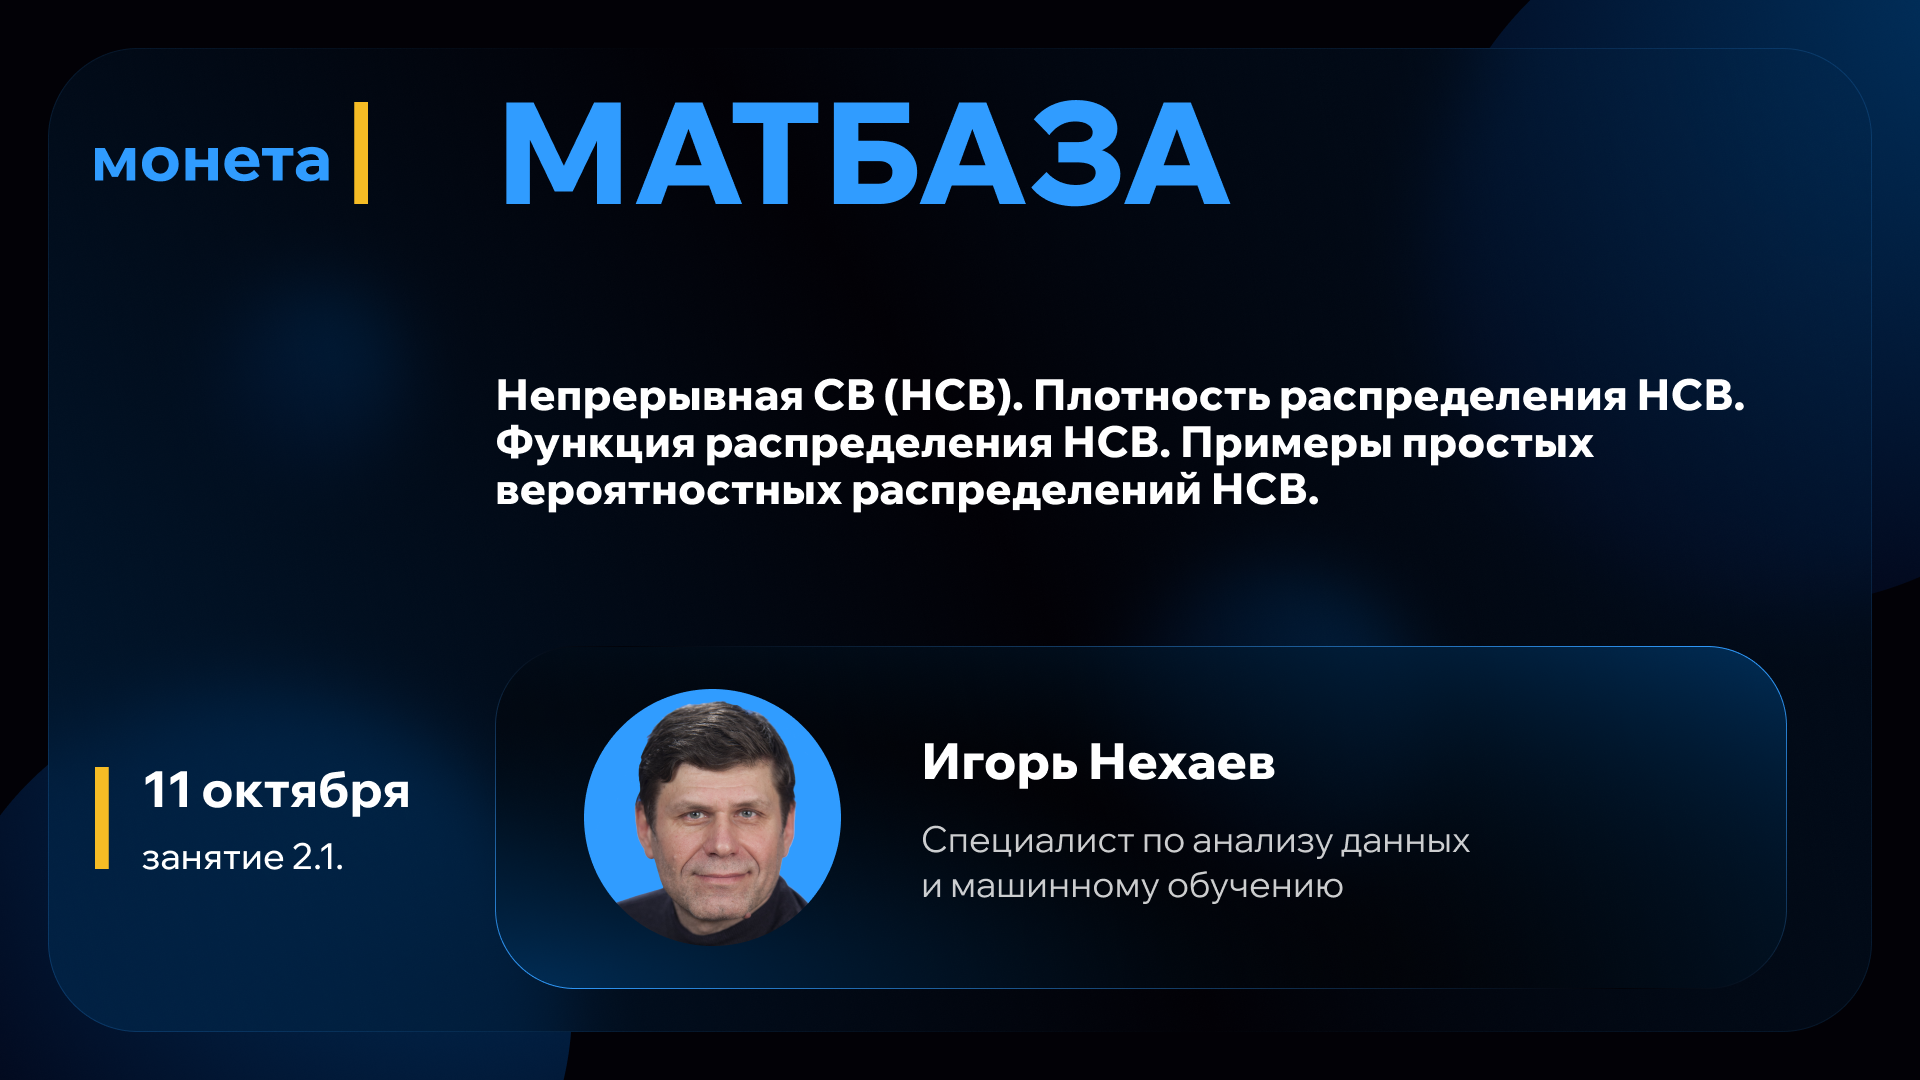

# **ПЛАН**

* Функция распределения С.В.

* Равномерное распределение

* Плотность распределения Н.С.В.



In [19]:
# импорт библиотек
import numpy as np
import scipy.stats as stat

import matplotlib.pyplot as plt
plt.style.use('ggplot')

Непрерывная случайная величина (НСВ) $X$ может принимать любое значение из некоторого интервала $(a,b)$, в том числе и бесконечного.

Это означает, в частности, что вероятность того, что НСВ $X$ примет какое-то конкретное значение $x$, равно нулю:
$$p(X = x) = 0$$
Например, если с.в. $X$ - это время наступления какого-либо события, то вероятность того, что событие наступит ровно в момент времени $t$ ни микроскундой, ни наноосекундой, ... раньше или позже равна нулю.

Это приводит нас к необходимости по-другому задавать закон распределения НСВ, в отличие от ДСВ.

---
Рассмотрим другой способ задания закона распределения С.В.

## **Функция распределения С.В.**
---

Если вероятность принятия конкретного значения у НСВ равна нулю, то вероятность попадания в интервал, явно должна быть конечной.

**Опр**. Пусть имеется С.В. $X$, принимающая значения из некоторого множества. Функция
$$F_X(x) = p(X \leq x)$$
называется функцией распределения С.В.

---
Что интересно, Функцию распределения можно задавать и для ДСВ.

**Свойства функции распределения.**

- $0 \leq F_X(x) \leq 1$,
- $F_X(-\infty) = 0$, $F_X(+\infty) = 1$,
- $p(a < X \leq b) = F(b) - F(a)$
- $F_X(x)$ - монотонно неубывающая функция, так как $F_X(x+dx)= F_X(x) + p(x < X \leq x+dx) \geq  F_X(x)$.

**ПРИМЕР. Функция биномиального распределения**

Рассмотрим пример построения функциия биномиального распределения с параметрами n=10, p=0,4.

---


In [20]:
# Задаем параметры распределения
p=0.4; n = 10
Xvals = np.arange(0, n+1, dtype=int)
# рассчитаем функцию вероятности для биномиального закона с n, p
rv = stat.binom(n, p)
p_k = rv.pmf(Xvals)
# рассчитаем функцию распределения для биномиального закона с n, p
Fbin = rv.cdf(Xvals);
Fbin

array([0.00604662, 0.0463574 , 0.16728975, 0.3822806 , 0.63310326,
       0.83376138, 0.94523812, 0.98770545, 0.99832228, 0.99989514,
       1.        ])

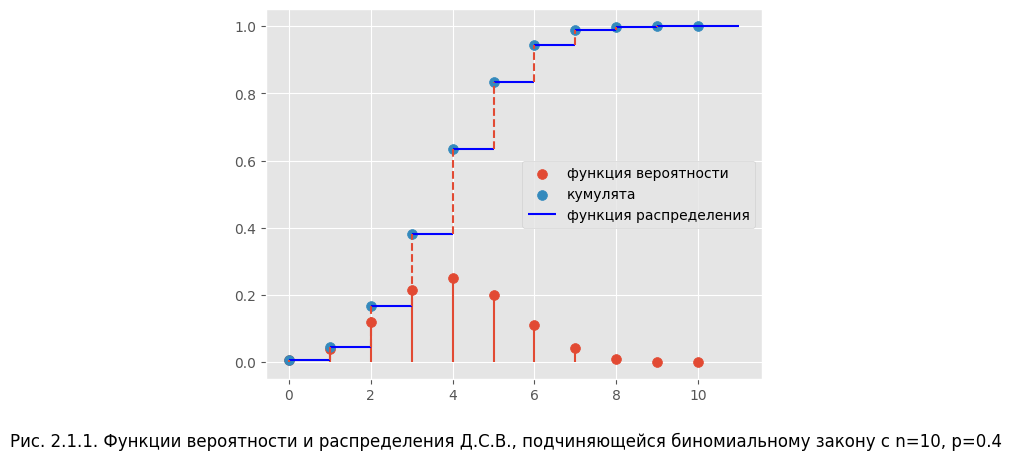

In [21]:
# построим график функции вероятности и функции распределения
Xvals1 = np.zeros((len(Xvals)+1,)); Xvals1[:-1] = Xvals; Xvals1[-1] = Xvals[-1]+1
Fbin0 = np.zeros((len(Xvals)+1,)); Fbin0[1:] = Fbin; Fbin0[0] = 0
plt.scatter(Xvals, p_k, s=50, label='функция вероятности')
plt.vlines(Xvals, 0, p_k)
plt.scatter(Xvals, Fbin, s=50, label='кумулята')
plt.hlines(Fbin,  Xvals1[:-1], Xvals1[1:], colors='b', label='функция распределения')
plt.vlines(Xvals,  Fbin0[:-1], Fbin0[1:], linestyles='--')
plt.legend(loc='best')
plt.suptitle(f'Рис. 2.1.1. Функции вероятности и распределения Д.С.В., подчиняющейся биномиальному закону с n={n}, p={p}', y=0);

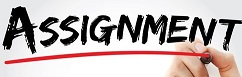

### ВОПРОС. Применение функции распределения
Какова вероятность того, что в серии из 10 испытаний с вероятностью успеха p=0.4, будет не более 3-х успехов?

Укажите наиболее точный ответ:

1. $p(X \le 3) \approx 0.12$
2. $p(X \le 3) \approx 0.17$
3. $p(X \le 3) \approx 0.21$
3. $p(X \le 3) \approx 0.38$

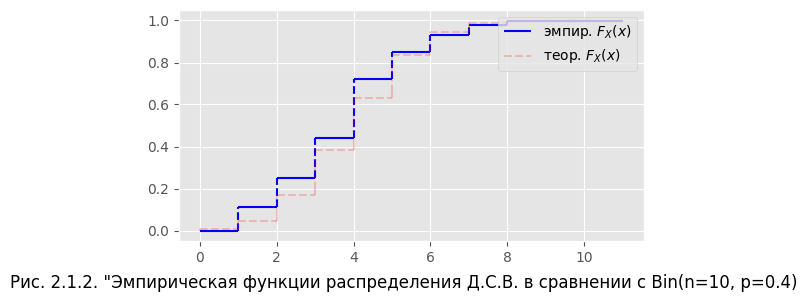

In [22]:
# сгенерируем 100 серий, определим кол-во успехов в каждой серии
N=100
p=0.4; n = 10
Xvals = np.arange(0, n+1, dtype=int)
# res = np.random.binomial(n=n, p=p, size=N)
res = rv.rvs(size=N)
# построим эмпирическую функцию распределения
nvals = {k:sum(res==k)/N for k in Xvals}
nn = list(nvals.values())
ncum = [sum(nn[:k]) for k in range(1, len(nn)+1)]

# сравним графики теоретической и эмпирической функций распределения
plt.figure(figsize=(6, 3))
plt.hlines(ncum,  Xvals1[:-1], Xvals1[1:], colors='b',label='эмпир. $F_X(x)$')
plt.vlines(Xvals1[1:-1],  ncum[:-1], ncum[1:], colors='b', linestyles='--')
plt.hlines(Fbin,  Xvals1[:-1], Xvals1[1:], colors='r', linestyles='--', label='теор. $F_X(x)$', alpha=0.2)
plt.vlines(Xvals,  Fbin0[:-1], Fbin0[1:], colors='r', linestyles='-.', alpha=0.2)
plt.legend(loc='best')
plt.suptitle(f'Рис. 2.1.2. "Эмпирическая функции распределения Д.С.В. в сравнении с Bin(n={n}, p={p})', y=0);

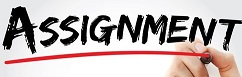

### ВОПРОС. Применение эмпирической функции распределения
Мы провели 100 серий из 10 испытаний. На основе эмпирических наблюдений построили функцию распределения СВ X="Кол-во успехов в серии из 10 испытаний Бернулли" (см. рис. 2.1.2). С помощью эмпирической функции распределения СВ определите какова вероятность того, что кол-во успешных испытаний будет не более 6, и не менее 3-х?

Укажите наиболее точный ответ:

1. $p(3 \le X \le 6) \approx 0.75$
2. $p(3 \le X \le 6)  \approx 0.55$
3. $p(3 \le X \le 6)  \approx 0.65$
3. $p(3 \le X \le 6)  \approx 0.45$

## **Равномерное распределение**
---


Если С.В. $X$ с равной вероятностью может принять любое значение в интервале от $a$ до $b$, то говорят, что С.В. подчиняется равномерному закону распределения с параметрами $a, b$:

$$X \in R(a,b)$$

---
По умолчанию используется равномерное распределение $R(0,1)$

Давате зададим и нарисуем функцию распределения для равномерно распределенной С.В. $X \in R(a,b)$.


- Так как $p(X < a) = 0$, то $F_X(x) = 0, \, \forall x < a$

- Так как $p(X \leq b) = 1$, то $F_X(x) = 1, \, \forall x \geq b$

- если $a \leq x_1 < x_2 \leq b$, то $p(x_1 < X \leq x_2) = \frac {x_2 - x_1}{b-a}$

отсюда получаем функцию распределения вида:

$$F_X(x) =
  \begin{cases}
    0,  & \quad x < a \\
    \frac {x-a}{b-a},  & \quad a \leq x \leq b \\
    1,  & \quad x > b \\
  \end{cases}
$$

---
Изобразим ее при $a=0, b=1$


<ipython-input-6-a40982a97286>:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x, rv.cdf(x), 'k-', lw=2, ls='-', label='$F_X(x) равномерного распределения$');


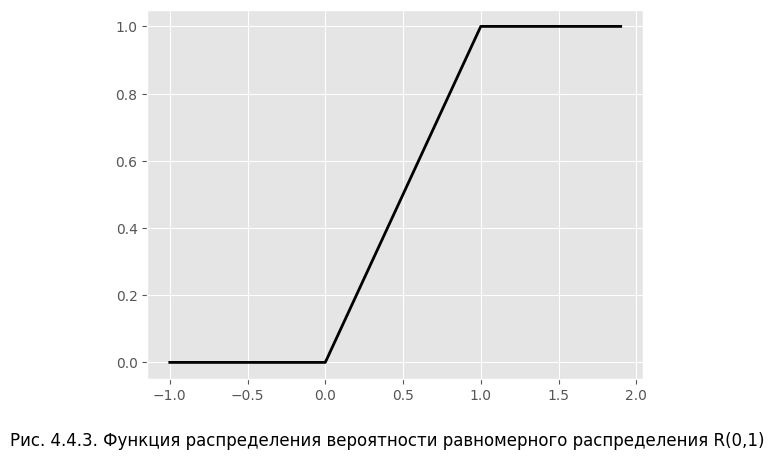

In [6]:
x = np.arange(-1, 2, 0.1)
rv = stat.uniform()
plt.plot(x, rv.cdf(x), 'k-', lw=2, ls='-', label='$F_X(x) равномерного распределения$');
plt.suptitle('Рис. 2.1.3. Функция распределения вероятности равномерного распределения R(0,1)', y=0);

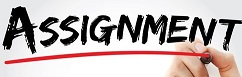

### **ЗАДАНИЕ на функцию равномерно распределенной СВ**.
Пусть поезда метро ходят точно с интервалом между ними в 5 минут. Какова вероятность того, что спустившись в метро, вам придется ждать более 3-х минут?

ОТВЕТЫ:

1. $p(T > 3) = 1$
2. $p(T > 3) = 0.6$
3. $p(T > 3) = 0.5$
4. $p(T > 3) = 0.4$


### **РЕШЕНИЕ**
---
Так как считаем, что с равной вероятностью следующий поезд метро может прийти как сразу, так и через 5 минут, получаем такую функцию распределения СВ ="время ожидания поезда":

$$F_X(t) = p(X < t) =
  \begin{cases}
    0,  & \quad t < 0 \\
    \frac {t}{5},  & \quad 0 \leq t \leq 5 \\
    1,  & \quad t > 5 \\
  \end{cases}
$$

Найдем вероятность события $X > 3$:

$p(X > 3) = 1 - p(X \leq 3) = 1 - F_X(3) = 1 - \frac {3}{5} = \frac {2}{5}$

---


<ipython-input-31-715c10966524>:10: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x, rv.cdf(x), 'k-', lw=1, ls='-', label='$F_X(x)$ равномерного распределения');


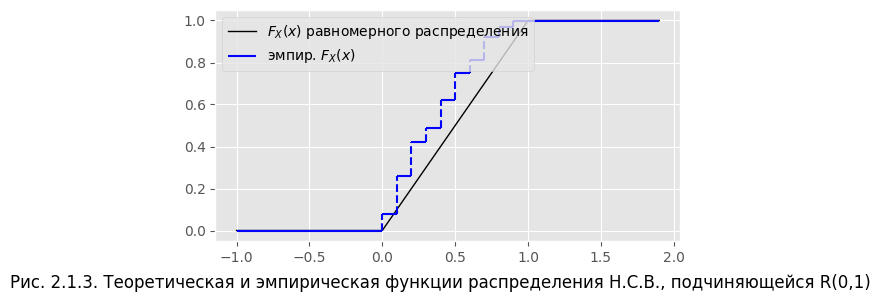

In [31]:
# сгенерируем 100 чисел и построим эмпирическую функцию распределения R(0,1)
N=100
x = np.arange(-1, 2, 0.1)
rv = stat.uniform()
res = rv.rvs(size=N)
ncum = [sum(res < x_i)/N for x_i in x]

# сравним графики теоретической и эмпирической функций распределения
plt.figure(figsize=(6, 3))
plt.plot(x, rv.cdf(x), 'k-', lw=1, ls='-', label='$F_X(x)$ равномерного распределения');
plt.hlines(ncum[1:],  x[:-1], x[1:], colors='b', label='эмпир. $F_X(x)$')
plt.vlines(x[:-1],  ncum[:-1], ncum[1:], colors='b', linestyles='--')
plt.legend(loc='best')
plt.suptitle('Рис. 2.1.3. Теоретическая и эмпирическая функции распределения Н.С.В., подчиняющейся R(0,1)', y=0)
plt.show()

## **Плотность распределения Н.С.В.**
---

Для анализа Н.С.В. намного информативнее является **плотность распределения вероятности** $f_X(x)$, которая определяется как производная от функции распределения:

$$f_X(x) = F_X'(x)$$

---
Плотность распределения можно задать только для НСВ

**Свойства плотности распределения.**

- $F_X(x) = \int_{-\infty}^x f_X(y) dy$, связь с функцией распределения;
- $\int_{-\infty}^{+\infty} f_X(y) dy = 1$, условие нормировки;
- $f_X(x) \geq 0, \, f_X(x)dx = p(x < X < x+dx) \geq 0, \quad \forall x$,  неотрицательна;
- $p(a < X < b) = \int_{a}^b f_X(y) dy$.

---
Для Н.С.В. вероятность принять конкретное значение =0, поэтом без разницы писать $\leq$ или $<$.

**ПРИМЕР**. Плотность равномерного распределения с параметрами $a,b$ будет иметь вид:

$$f_X(x) =
  \begin{cases}
    0,  & \quad x < a \\
    \frac {1}{b-a},  & \quad a \leq x \leq b \\
    0,  & \quad t > b \\
  \end{cases}
$$

<ipython-input-32-53f19d8c51c3>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x, rv.pdf(x), 'k-', lw=2, ls='--', label='$f_X(x) равномерного распределения$');


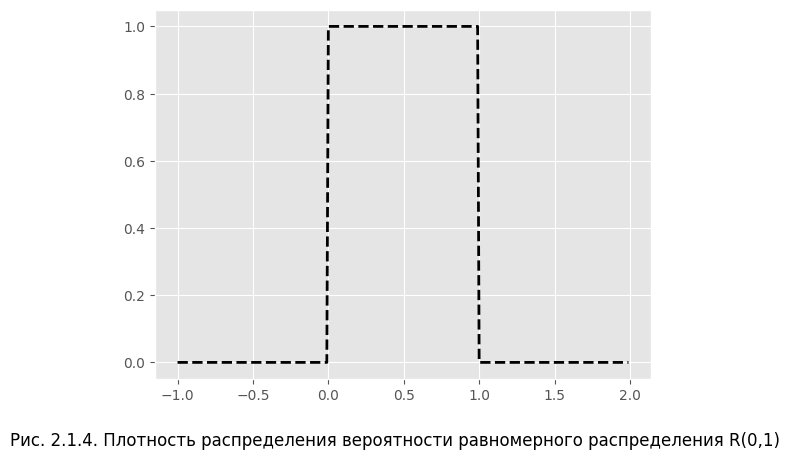

In [32]:
# Нарисуем плотность распределения для R(0,1)
x = np.arange(-1, 2, 0.01)
rv = stat.uniform()
plt.plot(x, rv.pdf(x), 'k-', lw=2, ls='--', label='$f_X(x) равномерного распределения$');
plt.suptitle('Рис. 2.1.4. Плотность распределения вероятности равномерного распределения R(0,1)', y=0);

Теперь проще понять почему данное распределение называется равномерным.

---
---

### **ЗАДАЧА с равномерным распределением**
Пусть для С.В. $X$ - время опоздания Васи на занятие (мин.) мы имеем следующую плотность распределения:

$$f_X(t) =
  \begin{cases}
    0,  & \quad t < 0 \\
    \frac {t}{25},  & \quad 0 \leq t \leq 5 \\
    \frac {10-t}{25},  & \quad 5 \leq t \leq 10 \\
    0,  & \quad t > 10 \\
  \end{cases}
$$

Постройте график плотности вероятности для данного распределения. Найдите вероятность того, что Вася опоздает более, чем на 7 минут.


---
---

# **Резюме**

- Для Н.С.В. невозможно задать функцию вероятности для каждого значения, так как множество ее значений несчетно и вероятность для Н.С.В. принять какое-то конкретное значение равно 0;

- Можно задать распределение Н.С.В. с помощью функции распределения С.В.:
$$F_X(x) = p(X \leq x)$$

- или с помощью ее производной - плотности распределения С.В.:
$$f_X(x) = F_X'(x); \quad  f_X(x)dx = p(x < X < x+dx)$$

- плотность распределения более информативна для анализа закона распределения НСВ.


Дополнительные материалы по работе с с вероятностными распределениями см:

- библиотеку numpy.random здесь: https://numpy.org/doc/stable/reference/random/index.html;
- библиотеку SciPy.stats можно найти здесь: https://docs.scipy.org/doc/scipy/tutorial/stats.html